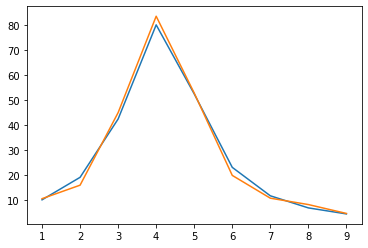

In [445]:
# PHYS 371 NUMERICAL METHODS



# HOMEWORK 10/17/2022-10/24/2022




from scipy.interpolate import CubicSpline,approximate_taylor_polynomial
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit



# Experimental values for a scattering cross section ($FE(E)$ 

# in the theory), with absolute error ${\rm Error}=\pm\sigma_i$ ), as 

# a function of energy, $E$



N     = np.array( [    1  ,  2   , 3    ,  4   ,   5  ,   6  ,   7  ,   8  ,   9  ]) 

x     = np.array( [    0  , 25   , 50   , 75   , 100  , 125  , 150  , 175  ,  200 ])

y   = np.array( [ 10.6  , 16.0 , 45.0 , 83.5 , 52.8 , 19.9 , 10.8 , 8.25 , 4.70 ])

Error = np.array( [  9.34 , 17.9 , 41.5 , 85.5 , 51.5 , 21.5 , 10.8 , 6.29 , 4.14 ])



# From the theoretical form of the function 

F = lambda E,f_r,E_r,G : f_r/((E - E_r )**2 + G**2 / 4)

# Using non-linear curve fitting one can obtain three parameters

# of the model  f_r, E_r, and G.





popt, pcov = curve_fit(F, E, FE,sigma = Error)



plt.plot(N,F(E,*popt))

plt.plot(N,FE)





#-------------------------------------------------------------------





#  1. Comparing the data with the fit, estimate the error on the fit,



#  2. Using the above-given data, try,

# Lagrange

# Cubic Splines

# Parabola (least square)

# methods to obtain three fits to cross-section data.

# If the SciPy packages are used, discussions and the originality of

# the approach will be evaluated. If programs of the interpolation

# algorithms are written, 30 % bonus points will be added to the marking.





# Presentation of the data:

#  i)  Discuss the results in a short scientific paper format.

# ii)  Present your programs in the appendix of the paper.



# Your writing will include,

# Abstract: what is done, what have you observed?

# Introduction: Why interpolation and fit are important? What has been

# done before, What is the originality of the present work?

# Method: Which algorithms are employed, and why these methods are chosen?

# What approaches were taken to improve the existing results (For example

# to obtain a better picture compared with the presented in the textbook

# of the course)

# Results: Summary of the performed calculations, discussions on the

# figures, and observations.

# Discussions/conclusions: Summary of the results, possible impact on

# the scientific community, and open problems.  



# Experimental values for a scattering cross section ($FE(E)$ 

# in the theory), with absolute error ${\rm Error}=\pm\sigma_i$ ), as 

# a function of energy, $E$

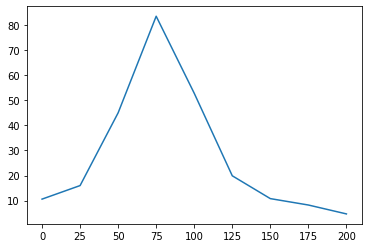

In [141]:
plt.plot(E,FE)

In [142]:
def Lagrange(x,y,x_val):
    
    data_len = len(x)
    order = data_len-1
    g = 0
    
    for i in range(data_len):
        
        p_j = 1
        for j in range(order+1):
            if i != j:
                p_j = p_j * (x_val-x[j])/(x[i]-x[j])
                
        g = g + p_j*y[i]
    
    return g

In [451]:
L = []
x_neww =[]
for i in range(0,200,1):
    x_neww.append(i)
    L.append(Lagrange(x,y,i))


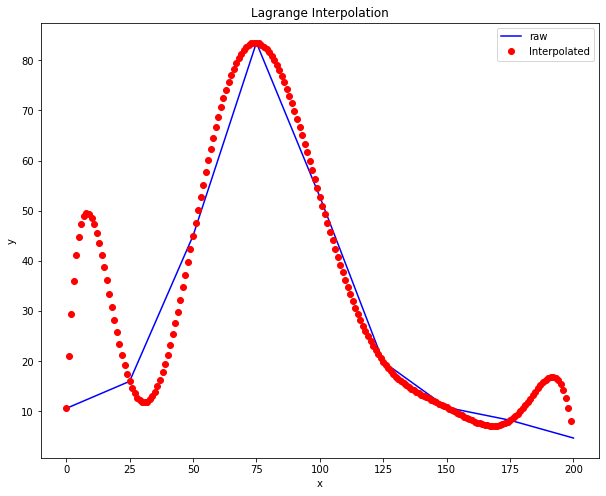

In [459]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b', label='raw')
plt.plot(x_neww, L, 'ro',label='Interpolated')
plt.title('Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['raw','Interpolated'])
plt.show()

In [304]:
def Cubic_S(x, y):
    
    
    N = len(x) # num data points
    n = N-1  # intervals
    h = (x[-1]-x[0])/n # Step size
    
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    
    
    trimatrix = np.diag([4 for i in range(N-2)]) + np.diag([1 for i in range(N-3)],-1) + np.diag([1 for i in range(N-3)], 1)
    
    M = np.zeros(n)
    
    K = np.array([6/h**2 * (y[i]-2*y[i+1]+y[i+2]) for i in range(n-1)])
    
    M = np.matmul(np.linalg.inv(trimatrix), np.transpose(K))
    M = list(M)
    M.insert(0,0)
    M.append(0)
    
    
    func = []
    for i in range(n):
        a[i] = (M[i+1]- M [i])/(6*h)
        b[i] = M[i]/2
        c[i] = (y[i+1]-y[i])/h - ((M[i+1]+2*M[i])/6) * h
        d[i] = y[i]
    for i in range(n):
        el = a[i]*(x[i])**3 + b[i] * (x[i])**2 + c[i]* (x[i]) + d[i]
        func.append(el)
        
    # to smooth graph we can create sunintervals hence more points to show interpolation
    

    return func
    
    


In [305]:
print(Cubic_S(E, FE))
a = Cubic_S(E, FE)

[10.6, 45.0, 4.2772827687776385, 183.27529455081003, 150.74882179675984, -273.67547864506616, -136.9622606774667, 60.236340206185496]


In [90]:
K = np.array([(y[i]-2*y[2]+y[i+2]) for i in range(7)]).T

In [133]:
print(np.arange(E[0],E[-1], 2))

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198]


In [308]:
    #l = 4
    #sub_h = h/l
    #x_new = np.arange(x[0], x[-1],sub_h)
    #func = []
    
    #for i in range(n):
        #for j in range(i*l-l+1, l*i):
            #elements = a[i]*(x_new[j]-x[i])**3 + b[i] * (x_new[j]-x[i])**2 + c[i]* (x_new[j]-x[i]) + d[i]
            #func. append(elements)
    #func.append(y[-1]

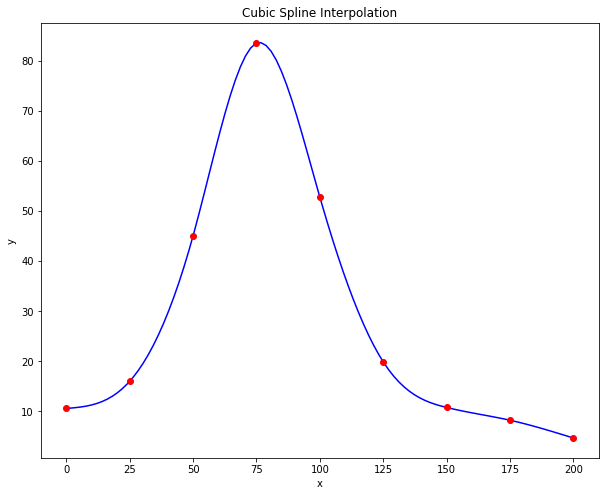

In [311]:
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 200, 100)
y_new = f(x_new)


# In[6]:


plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [485]:
def LS(x, y):
    n = len(x)
    A = np.array([[1 for i in range(n)], x])
    B = A.T
    inverse = np.linalg.inv(np.matmul(B.T, B))
    mul = np.matmul(inverse, B.T)
    c = np.matmul(mul, y)
    result = []
    for i in range(len(x)):
        r = c[1]*x[i]+c[0]
        result.append(r)

    return result
    
    

[39.873333333333335, 36.892500000000005, 33.91166666666667, 30.93083333333334, 27.950000000000003, 24.969166666666673, 21.98833333333334, 19.007500000000007, 16.026666666666674]


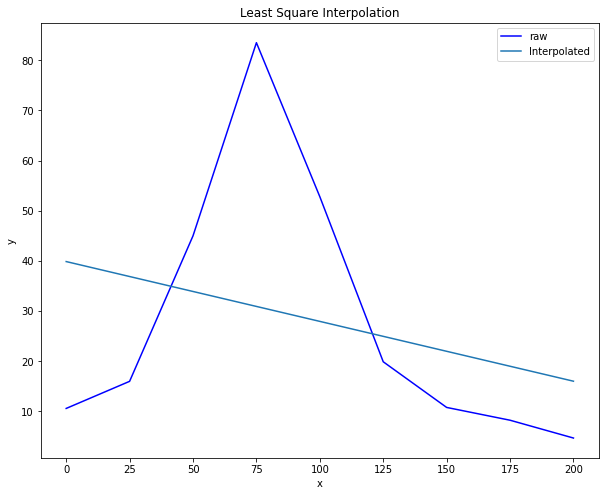

In [489]:
print(LS(x,y))
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b', label='raw')
plt.plot(x, LS(x,y),label='Interpolated')
plt.title('Least Square Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['raw','Interpolated'])
plt.show()

In [406]:
inverse = np.linalg.inv(np.matmul(B.T, B))
print(inverse, inverse.shape)

[[ 1.12573028e-18 -7.14022315e-18 -6.74412577e-18 -3.98003278e-18
  -1.48323174e-18 -7.77373651e-20  3.98121985e-19  4.52907253e-19
   2.63061779e-19]
 [-7.14022315e-18 -6.70596749e-18 -3.94399174e-18 -1.46196220e-18
  -6.98108813e-20  3.98537418e-19  4.50779664e-19  2.60641415e-19
  -1.40581871e-21]
 [-6.74412577e-18 -3.94399174e-18 -1.46195938e-18 -6.98092042e-20
   3.98538043e-19  4.50779697e-19  2.60641247e-19 -1.40600958e-21
  -1.10862121e-25]
 [-3.98003278e-18 -1.46196220e-18 -6.98092042e-20  3.98538056e-19
   4.50779702e-19  2.60641247e-19 -1.40601083e-21 -1.12281879e-25
  -8.24637288e-28]
 [-1.48323174e-18 -6.98108813e-20  3.98538043e-19  4.50779702e-19
   2.60641247e-19 -1.40601083e-21 -1.12291918e-25 -8.36056640e-28
  -6.63269168e-30]
 [-7.77373651e-20  3.98537418e-19  4.50779697e-19  2.60641247e-19
  -1.40601083e-21 -1.12291904e-25 -8.36146490e-28 -6.73485413e-30
  -5.93382566e-32]
 [ 3.98121985e-19  4.50779664e-19  2.60641247e-19 -1.40601083e-21
  -1.12291918e-25 -8.3614649

In [407]:
mul = np.matmul(inverse, B.T)
mul
y.shape

(9,)

In [408]:
c = np.matmul(mul, y)
c


array([6.33763034e+00, 2.27442961e-03, 1.82490896e-05, 1.58411625e-07,
       1.49307874e-09, 1.53088682e-11, 1.71278720e-13, 2.11114561e-15,
       2.95756134e-17])

In [416]:
result = []
for i in range(len(x)):
    r = c[8]*x[i]**8+c[7]*x[i]**7+c[6]*x[i]**6+c[5]*x[i]**5+c[4]*x[i]**4+c[3]*x[i]**3+c[2]*x[i]**2+c[1]*x[i]+c[0]
    result.append(r)
print(result)

[6.337630343261841, 6.4091638951772625, 6.536372624396196, 6.849537537182978, 7.886521797269575, 11.471077605337117, 22.680394935921818, 53.60369229104615, 129.7756089704071]
